# Feature Extraction
## Spectral Centroid
- Spectral centroid indicates where the ”center of mass” for a sound is located
- Calculated as the weighted mean of the frequencies present in the sound. 
- Consider two songs, one from a blues genre and the other belonging to metal. 
- Now, as compared to the blues genre song, which is the same throughout its length, the metal song has more frequencies towards the end. 
  - For blues song spectral centroid will lie somewhere near the middle of its spectrum 
  - For a metal song spectral centroid would be towards its end
  
### Library.function  
- librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal:

In [2]:
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import minmax_scale

In [3]:
source_audio = 'sample_music/T08-violin.wav'

In [4]:
wave_x, sample_rate = librosa.load(source_audio)
ipd.Audio(wave_x, rate=sample_rate)

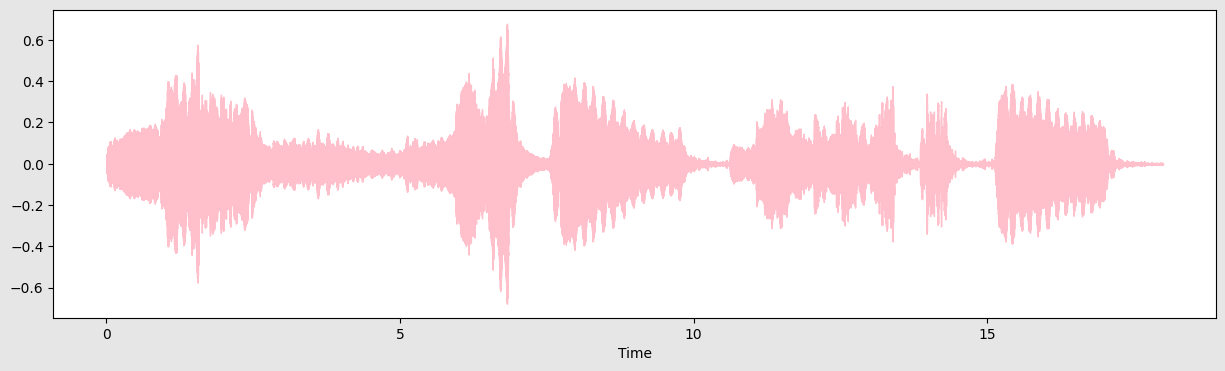

In [5]:
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x, sr=sample_rate, color='pink')

In [6]:
all_centroids = librosa.feature.spectral_centroid(y=wave_x, sr=sample_rate)

In [7]:
all_centroids.shape

(1, 775)

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(y=wave_x, sr=sample_rate)[0]
spectral_centroids.shape

(775,)

In [9]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))

In [10]:
t = librosa.frames_to_time(frames)
t.shape

(775,)

In [11]:
# Normalizing the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

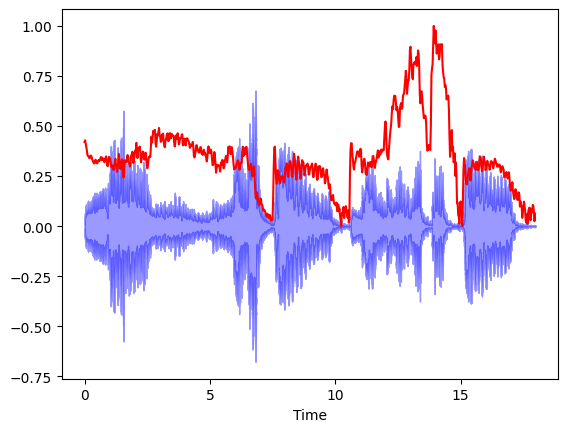

In [12]:
# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(wave_x, sr=sample_rate, alpha=0.4, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')